# Segmentation Results Visualization
This notebook visualizes the segmentation masks generated by the model.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set matplotlib style
plt.style.use('default')
%matplotlib inline

## Configuration

In [9]:
# Paths
IMAGE_DIR = "/data/tl28853/eye/NR206/test_512"
MASK_DIR = "/data/tl28853/eye/NR206/pred_binary"

# Get all images
image_path = Path(IMAGE_DIR)
mask_path = Path(MASK_DIR)

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}
image_files = sorted([f for f in image_path.iterdir() if f.suffix.lower() in image_extensions])

print(f"Found {len(image_files)} images")

Found 40 images


## Visualization Functions

In [10]:
def load_image_and_mask(image_file):
    """Load image and corresponding mask"""
    img_path = image_path / image_file.name
    msk_path = mask_path / image_file.name
    
    # Load image
    image = cv2.imread(str(img_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Load mask
    mask = cv2.imread(str(msk_path), cv2.IMREAD_GRAYSCALE)
    
    return image, mask


def visualize_single(image, mask, title=""):
    """Visualize single image with mask"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Predicted mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off')
    
    # Overlay
    overlay = image.copy()
    mask_colored = np.zeros_like(image)
    mask_colored[:, :, 1] = mask  # Green channel
    overlay = cv2.addWeighted(overlay, 0.7, mask_colored, 0.3, 0)
    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')
    
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


def visualize_grid(image_files, n_samples=6):
    """Visualize multiple images in a grid"""
    fig, axes = plt.subplots(n_samples, 3, figsize=(15, 5*n_samples))
    
    for i, img_file in enumerate(image_files[:n_samples]):
        image, mask = load_image_and_mask(img_file)
        
        # Original image
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f'{img_file.name} - Original')
        axes[i, 0].axis('off')
        
        # Mask
        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title('Mask')
        axes[i, 1].axis('off')
        
        # Overlay
        overlay = image.copy()
        mask_colored = np.zeros_like(image)
        mask_colored[:, :, 1] = mask
        overlay = cv2.addWeighted(overlay, 0.7, mask_colored, 0.3, 0)
        axes[i, 2].imshow(overlay)
        axes[i, 2].set_title('Overlay')
        axes[i, 2].axis('off')
    
    plt.tight_layout()
    plt.show()

## Display Single Random Sample

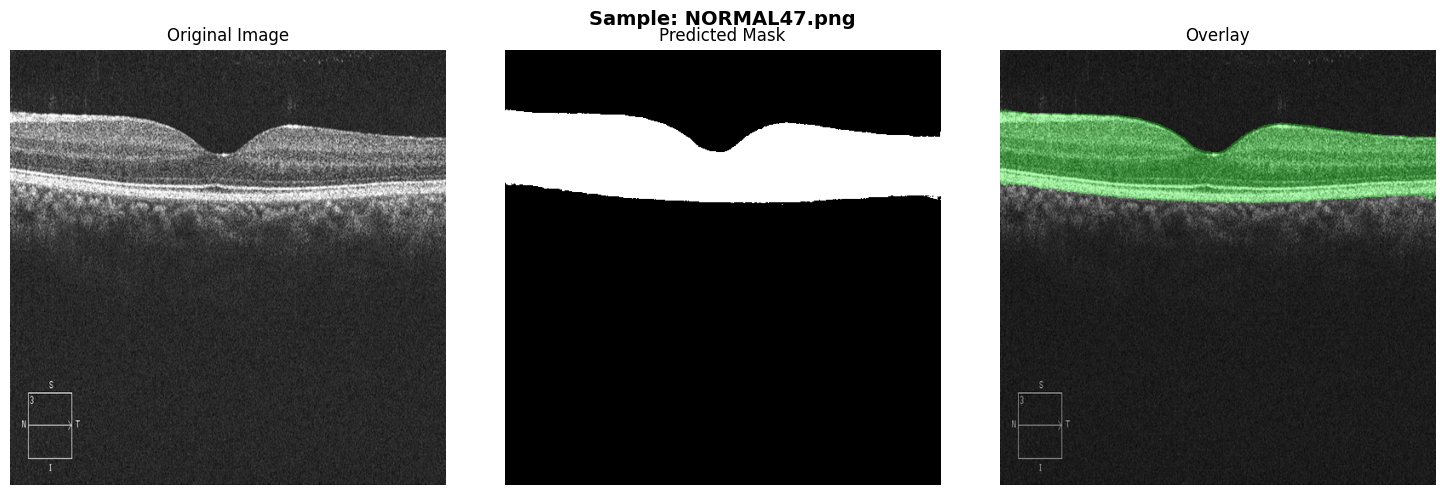

In [11]:
# Select a random image
random_image = random.choice(image_files)
image, mask = load_image_and_mask(random_image)

visualize_single(image, mask, title=f"Sample: {random_image.name}")

## Display Specific Image by Index

In [ ]:
# Change index to view different images (0 to len(image_files)-1)
index = 0

if index < len(image_files):
    image, mask = load_image_and_mask(image_files[index])
    visualize_single(image, mask, title=f"Image {index}: {image_files[index].name}")
else:
    print(f"Index {index} out of range. Max index: {len(image_files)-1}")

## Display Multiple Samples in Grid

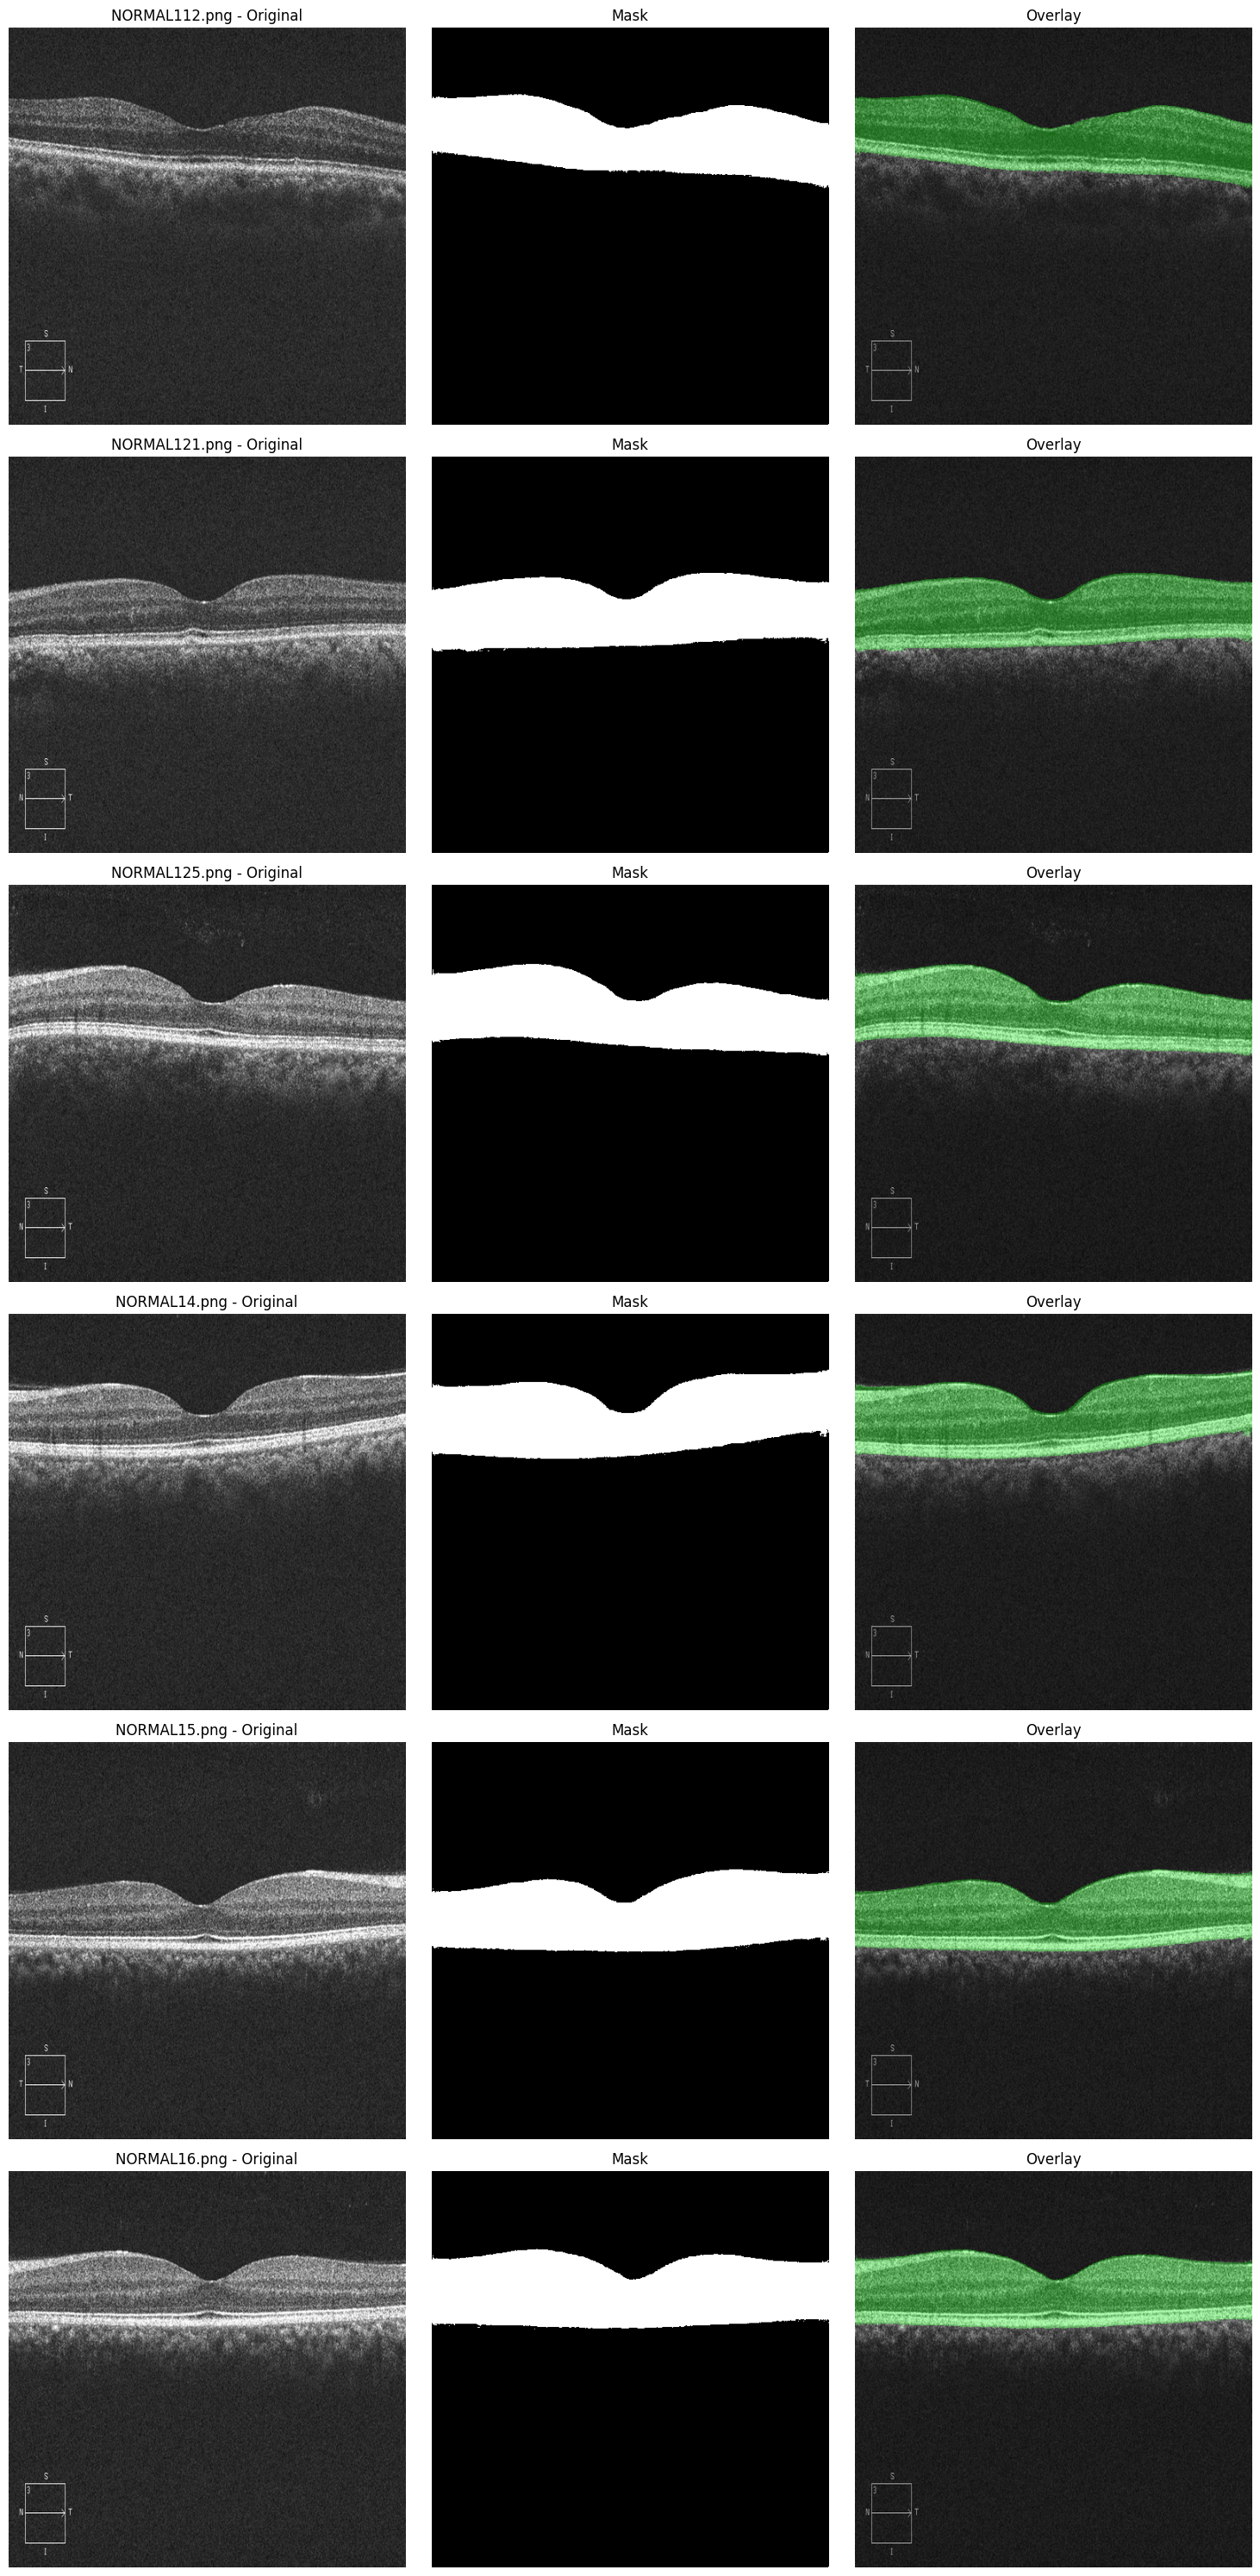

In [12]:
# Display first 6 images
visualize_grid(image_files, n_samples=6)

## Display Random Samples

In [ ]:
# Display 6 random samples
random_samples = random.sample(image_files, min(6, len(image_files)))
visualize_grid(random_samples, n_samples=len(random_samples))

## Mask Statistics

In [ ]:
# Calculate mask statistics
mask_areas = []

for img_file in image_files:
    msk_path = mask_path / img_file.name
    mask = cv2.imread(str(msk_path), cv2.IMREAD_GRAYSCALE)
    
    # Calculate percentage of white pixels
    white_pixels = np.sum(mask > 127)
    total_pixels = mask.shape[0] * mask.shape[1]
    percentage = (white_pixels / total_pixels) * 100
    mask_areas.append(percentage)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(mask_areas, bins=50, edgecolor='black')
plt.xlabel('Mask Coverage (%)')
plt.ylabel('Number of Images')
plt.title('Distribution of Mask Coverage')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mean mask coverage: {np.mean(mask_areas):.2f}%")
print(f"Median mask coverage: {np.median(mask_areas):.2f}%")
print(f"Min mask coverage: {np.min(mask_areas):.2f}%")
print(f"Max mask coverage: {np.max(mask_areas):.2f}%")

## Interactive Viewer (Browse Images)

In [ ]:
# Simple interactive viewer - run this cell and change current_idx to browse
current_idx = 0

def show_image(idx):
    if 0 <= idx < len(image_files):
        image, mask = load_image_and_mask(image_files[idx])
        visualize_single(image, mask, title=f"Image {idx}/{len(image_files)-1}: {image_files[idx].name}")
    else:
        print(f"Index out of range. Valid range: 0 to {len(image_files)-1}")

# Show current image
show_image(current_idx)

# To view next/previous images, change current_idx and run this cell again
# Or run: show_image(current_idx + 1) or show_image(current_idx - 1)